In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.plotly as py

In [5]:
import plotly.graph_objs as go

In [6]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='yflee', api_key='C927O8f5iBP7kfeXXLge')
plotly.offline.init_notebook_mode(connected=True)

In [7]:
file = open("input.txt", "r") 
instr=file.read()
instr

'When Adam Rodin took his 93-year-old father Sam to hospital for breathing difficulties, he was confident that he was in the right hands. Not only had Mr Rodin had always had good health, the family were confident they could navigate the NHS: Adam is a a consultant obstetrician and gynaecologist at Barnet Hospital, his wife Bridget is a retired nurse, and his twin brother Andrew is a consultant physician. But Mr Rodin died five weeks after being admitted with breathing difficulties to a large teaching hospital in London. This weekend his son came forward - despite working in the NHS - to accuse those who were supposed to care for his father of a string of failings. Mr Rodin jnr said that his father was not fed properly, losing a third of his body weight in hospital, that he was shunted between 15 wards in six weeks, that there was a lack of communication among staff, and finally, that a nurse berated his family for giving the 93 year-old water within his earshot. "He was completely let

In [8]:
spt_in=instr.split(" ")
len(spt_in)

315

In [9]:
file = open("output.txt", "r") 
outstr=file.read()
outstr

'Adam Rodin, 93, was a consultant obstetrician and gynaecologist at Barnet Hospital, his wife Bridget is a consultant physician\n'

In [10]:
spt_out=outstr.split(" ")
len(spt_out)

19

In [11]:
cross=np.load('cross_attention.npy')

In [12]:
cross.shape

(1, 8, 100, 400)

In [13]:
cross[0].shape

(8, 100, 400)

In [14]:
inatt=np.load('input_self_attention.npy')
#inatt

In [15]:
inatt.shape

(1, 8, 400, 400)

In [16]:
#fig, ax = plt.subplots()
#fig.set_size_inches(15, 15)
#sns.heatmap(inatt[0][1][:len(spt_in),:len(spt_in)])
#plt.yticks(np.arange(len(spt_in)), spt_in,fontsize=10, rotation=30);

In [17]:
spt_in[-1]=spt_in[-1][:-1]

In [18]:
type(inatt[0][1][:len(spt_in),:len(spt_in)])

numpy.ndarray

In [19]:
temp=[x for x in range(0, len(spt_in))]
data = [
    go.Heatmap(
        z=inatt[0][1][:len(spt_in),:len(spt_in)],
        x=spt_in,
        y=temp,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    autosize=False,
    width=1080,
    height=1080,
    title='Input Self Attention Head 2',
    xaxis=dict(
        automargin=True,
        tickmode='array',
        tickvals=temp,
        ticktext=spt_in,

    ),    
    yaxis=dict(
        automargin=True,
        tickmode='array',
        tickvals=temp,
        ticktext=spt_in,

    ),    
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)
#py.iplot(data,layout)

In [21]:
import networkx as nx

In [29]:
from networkx.algorithms import bipartite

In [34]:
inatt[0][1][:len(spt_in),:len(spt_in)]

array([[0.0057302 , 0.0028614 , 0.00057061, ..., 0.00089052, 0.00271761,
        0.00023108],
       [0.00614731, 0.03457621, 0.01018525, ..., 0.00038336, 0.00066343,
        0.00022594],
       [0.00361533, 0.01022245, 0.03576317, ..., 0.00176513, 0.00146563,
        0.00058958],
       ...,
       [0.00116945, 0.00325245, 0.00063518, ..., 0.00130318, 0.01266697,
        0.00061923],
       [0.00112798, 0.00144949, 0.0001617 , ..., 0.00257911, 0.11434533,
        0.00192293],
       [0.00176171, 0.00258002, 0.00062596, ..., 0.0045381 , 0.05437807,
        0.00471031]], dtype=float32)

In [84]:
df = pd.DataFrame(
    {'input': "In_"+spt_in[1],
     'weight':inatt[0][1][1,:10],
     'output': spt_in[:10]})
df

input       output    weight
0  In_Adam         When  0.006147
1  In_Adam         Adam  0.034576
2  In_Adam        Rodin  0.010185
3  In_Adam         took  0.000255
4  In_Adam          his  0.001832
5  In_Adam  93-year-old  0.005319
6  In_Adam       father  0.020041
7  In_Adam          Sam  0.001556
8  In_Adam           to  0.004630
9  In_Adam     hospital  0.001889

[('to', 'In_Adam', {'weight': 0.0046298569068312645}), ('Sam', 'In_Adam', {'weight': 0.0015556778525933623}), ('father', 'In_Adam', {'weight': 0.02004092000424862}), ('his', 'In_Adam', {'weight': 0.001832343521527946}), ('Adam', 'In_Adam', {'weight': 0.034576211124658585}), ('When', 'In_Adam', {'weight': 0.006147313397377729}), ('Rodin', 'In_Adam', {'weight': 0.010185250081121922}), ('took', 'In_Adam', {'weight': 0.000255466322414577}), ('hospital', 'In_Adam', {'weight': 0.001888774218969047}), ('In_Adam', '93-year-old', {'weight': 0.005318577867001295})]


/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



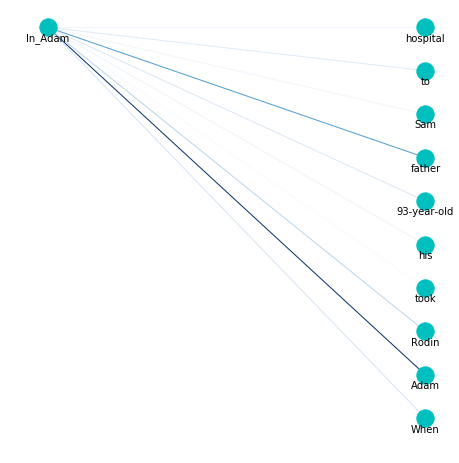

In [94]:
B = nx.Graph()
B.add_nodes_from(df['output'], bipartite=0)
B.add_nodes_from(df['input'], bipartite=1)
B.add_weighted_edges_from(
    [(row['input'], row['output'], row['weight']) for idx, row in df.iterrows()], 
    weight='weight')

print(B.edges(data=True))
# [('test1', 'example.org', {'weight': 1}), ('test3', 'example.org', {'weight': 1}), ('test2', 'example.org', {'weight': 1}), ('website.com', 'else', {'weight': 1}), ('site.com', 'something', {'weight': 1})]

pos = {node:[0, i] for i,node in enumerate(df['input'])}
pos.update({node:[1, i] for i,node in enumerate(df['output'])})
plt.figure(figsize=(6,6))
col=[]
for u,v in B.edges():
    col.append(B[u][v]['weight'])
nx.draw(B, pos, with_labels=False,edge_color=col,edge_cmap=plt.cm.Blues,node_color="c")
for p in pos:  # raise text positions
    pos[p][1] -= 0.25
nx.draw_networkx_labels(B, pos,font_size=10)
#edge_color=df['weight'],
plt.show();